# Grayscale Histogram Equalization

#### Importing Libraries

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
I=cv2.imread('leena.jpeg',0)
a=I.shape

#### Calculating Histogram of given Image

/home/tejas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  """


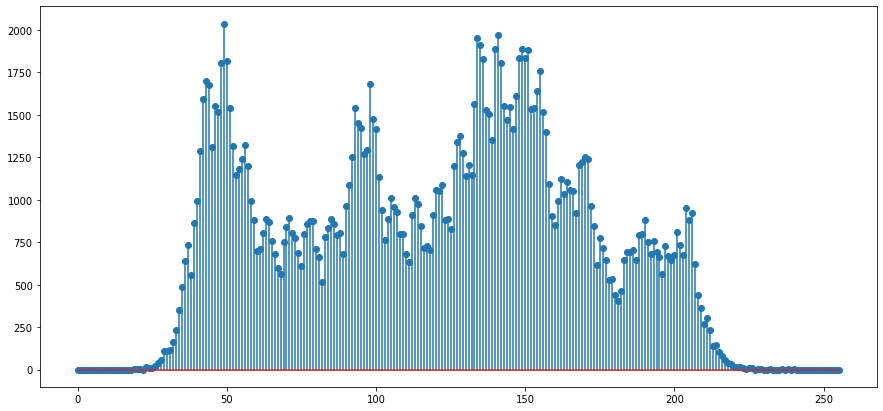

In [5]:
hist=np.zeros(256)
for i in range (a[0]):
    for j in range (a[1]):
        hist[I[i,j]]+=1
plt.stem(hist)
plt.rcParams['figure.figsize']=(15,7)

#### Calculating Cummulative Histogram

/home/tejas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  import sys


<StemContainer object of 3 artists>

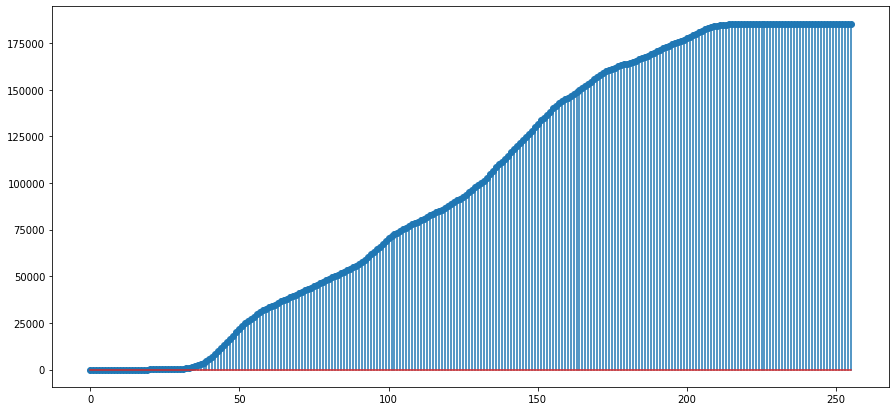

In [6]:
chist=np.zeros(256)
for i in range(len(hist)):
    if i==0:
        chist[i]=hist[i]
    else:
        chist[i]=hist[i]+chist[i-1]
plt.stem(chist)


#### Calculating index such that 
$S(m)$ $\neq$ 0

In [7]:
for i in range(len(chist)):
    if chist[i]!=0:
        m=i
        break

#### Calculating LUT(Look Up Table)
$T(k)$ = { [$S(k)$ - $S(m)$ ]  $\div$  [$S(255)$ - $S(m)$]  }  $\times$ 255 


In [8]:
LT=np.zeros(256)
for k in range (m,256):
    LT[k]=((chist[k]-chist[m])/(chist[255]-chist[m]))
LT=LT*255

#### Applying LUT T to I, to get image J
$J(x,y)$ = $T(I(x,y))$ 

In [10]:
I1=np.zeros((a[0],a[1]),dtype='uint8')

In [11]:
for i in range (a[0]):
    for j in range (a[1]):
        I1[i][j]=(LT[I[i][j]])

In [12]:
cv2.imwrite('equilized.jpeg',I1)

True

#### Plotting Equalized Hiostogram 

/home/tejas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  """


<StemContainer object of 3 artists>

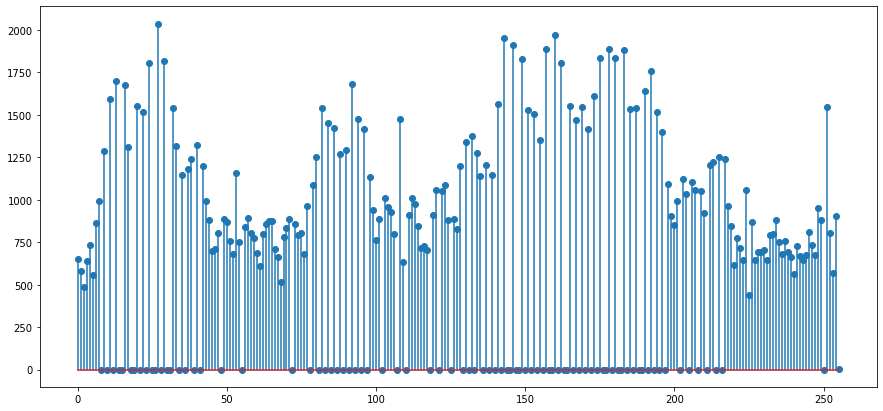

In [15]:
nhist=np.zeros(256)
for i in range (a[0]):
    for j in range (a[1]):
        nhist[I1[i,j]]+=1
plt.stem(nhist)